In [1]:
%matplotlib inline 
import math
import matplotlib.pyplot as plt

slopes = [80/32, 80/64, 80/128, 80/256, 80/512]
# slopes = []
# for i in range(1, 512, 63):
#     slopes.append(80/i)
drift = []
dt = 18.25361108
df = 2.97

for i in range(len(slopes)):
    drift.append(1/(slopes[i])*df/dt*8)
print(drift)

[0.5206641008371918, 1.0413282016743837, 2.0826564033487673, 4.165312806697535, 8.33062561339507]


In [2]:
80/(3*16/512)

853.3333333333334

In [2]:
prob = []
for i in range(len(slopes)):
    edges = math.ceil(16*2/slopes[i])
    width = math.ceil(512-80/slopes[i])
    prob.append((edges+width)/512)

    
print(prob)

[0.962890625, 0.92578125, 0.8515625, 0.701171875, 0.400390625]


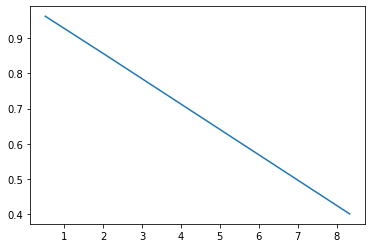

In [4]:
plt.plot(drift, prob)

In [1]:
import sys
sys.path.insert(1, '../GBT_pipeline')
from synthetic_real_dynamic_edit import create_true, create_full_cadence, create_false, create_true_single_shot, create_true_faster
import matplotlib.pyplot as plt
import numpy as np 
from skimage.transform import rescale, resize, downscale_local_mean

def resize_par(data, factor):
    test =  np.zeros((data.shape[0], data.shape[1],data.shape[2],data.shape[3]//factor))
    print(data.shape, test.shape)
    for i in range(6):
        test[:,i,:,:] = downscale_local_mean(data[:,i,:,:], (1,1,factor))
    return test

/home/pma/.local/lib/python3.6/site-packages/numba/core/decorators.py:255: RuntimeWarning: nopython is set for njit and is ignored
  warnings.warn('nopython is set for njit and is ignored', RuntimeWarning)


In [11]:
NUM_SAMPLES = 2000
plate = np.random.rand(NUM_SAMPLES, 6, 16, 4096)

factor =1


test = create_full_cadence(create_false, plate = plate, samples = NUM_SAMPLES, snr_base=500, snr_range=1,factor=factor)
true_single_shot = resize_par(test - plate, 8)
test = resize_par(test, 8)

(2000, 6, 16, 4096) (2000, 6, 16, 512)
(2000, 6, 16, 4096) (2000, 6, 16, 512)


In [12]:
collapse = np.sum(true_single_shot, axis=0)
print(collapse.shape)

(6, 16, 512)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  


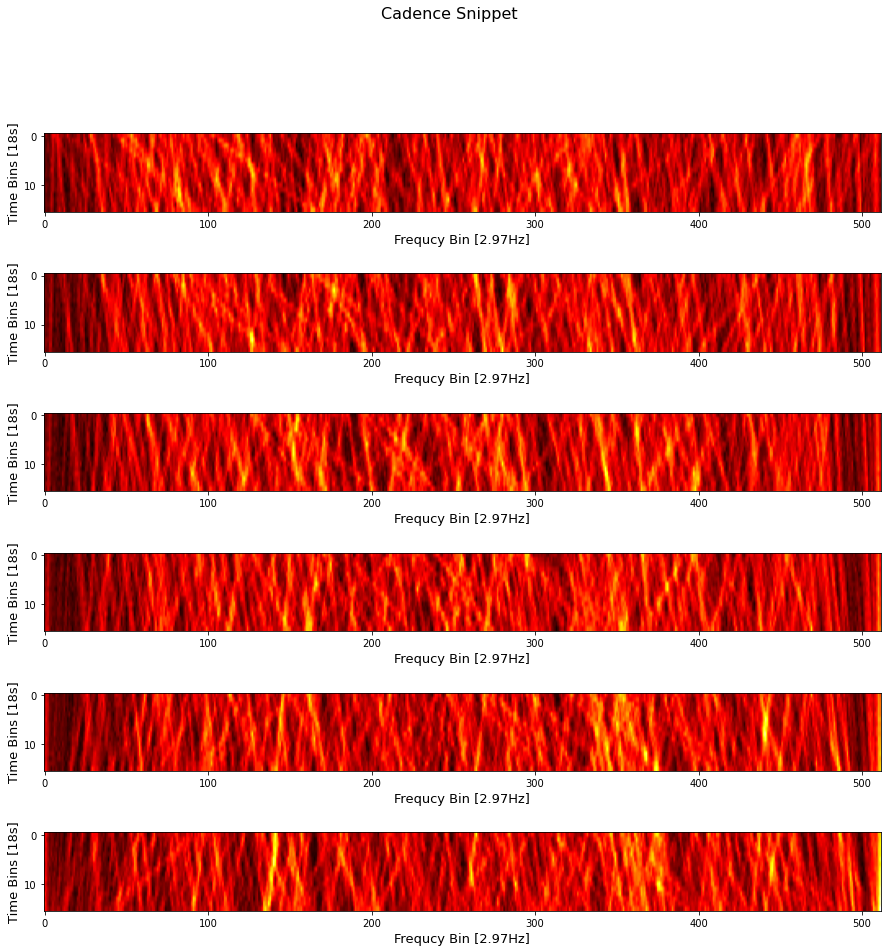

In [14]:
%matplotlib inline
def plot_cadence(data):
    fig, ax = plt.subplots(6, 1, figsize=(15,15))
    fig.suptitle('Cadence Snippet', fontsize=16)
    for i in range(6):
        ax[i].imshow(data[i,:,:], CMAP='hot',aspect=3, vmin = data.min(), vmax = data.max())
        ax[i].set_ylabel('Time Bins [18s]', fontsize=13)
        ax[i].set_xlabel('Frequcy Bin [2.97Hz]', fontsize=13)
    plt.show()

plot_cadence(collapse)

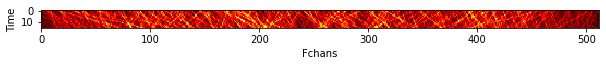

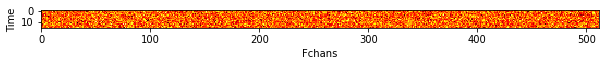

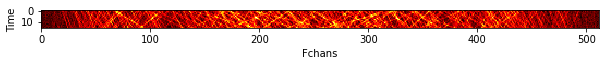

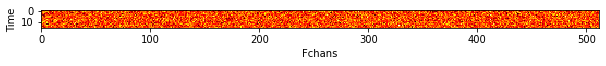

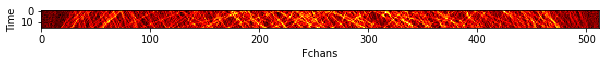

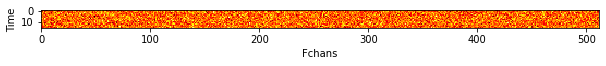

In [8]:
%matplotlib inline
import random 
for i in range(6):
    plt.figure(figsize=(10,8))
    plt.xlabel("Fchans")
    plt.ylabel("Time")
    plt.imshow(collapse[i,:,:], interpolation='nearest', cmap=plt.get_cmap('hot'), vmin = collapse[i,:,:].min() ,vmax =collapse[i,:,:].max())
    plt.show()

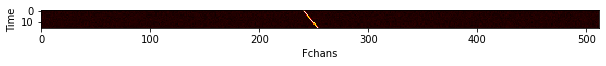

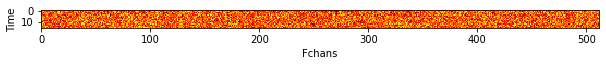

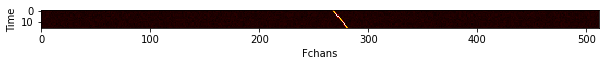

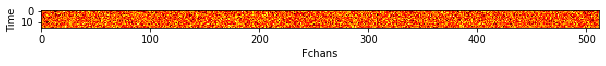

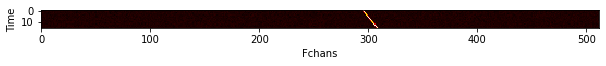

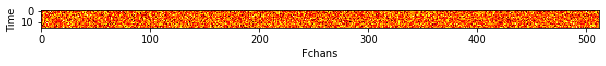

In [9]:
%matplotlib inline
import random 
index = int(random.random()*1000)

for i in range(6):
    plt.figure(figsize=(10,8))
    plt.xlabel("Fchans")
    plt.ylabel("Time")
    plt.imshow(test[index,i,:,:], interpolation='nearest', cmap=plt.get_cmap('hot'))
    plt.show()